<h1 style='font-size:4rem;color:orange;'>Math 267 Project #1

 **Solution notebook**                                             

<hr>
In this jupyter/colab notebook we will show how to implement Euler's method using the python programming language. The emphasis will be more on code readability than efficiency.

Your instructions.

Make a copy of this notebook on your local drive. Rename the notebook "project#1_lastname.ipynb". Edit the cell above to enter your name and student ID. Read and execute each cell below.  Complete all exercises. Once done you will share this notebook with  rm908@email.vccs.edu
<hr>

# Euler's Method

The ability to obtain a formulaic solution for an ODE is the exception rather than the rule. The majority
of the time we resort to finding a “numerical solution” where the time axis is discretized. The numerical
solution will yield a list of points {(t0, y0), (t1, y2), (t3, y3), (t4, y4) ... ....} which ideally lie along the solution
curve. Please consult section 2.6 in the text  for further details on  Euler’s method.

Now to solve the initial value problem:

$$y'=f(t,y)$$
$$y(t_0)=y_0$$

using Euler's method we simply iterate the following:

$$t_{n+1} = t_n + \Delta t$$
$$y_{n+1} = y_n + f(t_n,y_n)\cdot \Delta t$$

where $\Delta t$ is the "step size". We often use the letter "h" to represent the step size. Also recall that $f(t,y)$ is the "slope field" for the differential equation. Also note for this example that the letter "y" is being used to represent the dependent variable and "t" for the indepentent varialbe.
<hr>

## Exercise #1

<h3> For our first exercise we use Euler's method to solve the following initial value problem.
<br><br>
$$y' = -y +t$$
$$y(0) = 0.5$$

<h3> Solve on interval $[0,1.2]$ and use h = 0.1.


Execute the cell below to import necessary libraries

In [ ]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# uncomment the line below if you are running a macbook
from IPython import display
%config InlineBackend.figure_format ='retina'

<h3> The python code to numerically solve the above ode is in the cell below. Read the code and understand each instruction.
    Afterwards execute the cell.

In [ ]:
# define slope function

def f(t,y):
    return -y + t

h = 0.1

# We first "discretize" the domain.  The array t holds the t values

t = np.arange(0,1.3,h) 
y_euler = np.zeros_like(t)  # initialize y array to zeros
y_euler[0] = 0.5 # set the intial value

# implement Euler's method

for i in range(len(y_euler)-1):
    y_euler[i+1] = y_euler[i] + f(t[i],y_euler[i])* h
    

<h3> Let us visualize results.
 To visualize the results in table form execute the following cell.

In [ ]:
# the exact solution of the ode is defined by the function below

def y_e(t):
    return 1.5*np.exp(-t)-1+t

y_exact = y_e(t) # compute exact values

# Now display results in a table

df = pd.DataFrame({"t":t,"y_exact":y_exact,"y_Euler":y_euler})
df

,t,y_exact,y_Euler
0,0.0,0.500000,0.500000
1,0.1,0.457256,0.450000
2,0.2,0.428096,0.415000
3,0.3,0.411227,0.393500
4,0.4,0.405480,0.384150
5,0.5,0.409796,0.385735
6,0.6,0.423217,0.397162
7,0.7,0.444878,0.417445
8,0.8,0.473993,0.445701
9,0.9,0.509854,0.481131


<hr>
<h3> To compute percent error for our results we use the formula:
<br><br>

$$ \frac{(y_{exact} - y_{euler})}{y_{exact}}\times100\%  $$

 Execute the following cell to compute and display the percent error in approximating $y(1)$ for the previous example. You should see an error of about 1.6%.

In [ ]:
# For the above ode the % difference when computing y(1) is:
error = np.abs(y_exact[1]-y_euler[1])/y_exact[1]*100
print(f"The percent error using h = {h} is {round(error,2)}%.")

The percent error using h = 0.1 is 1.59%.


<h3> Exercise 1.a

<h4> One way to improve the result is by decreasing the value of h. Go back and reexecute the code in all the previous cells  with h changed to 0.05. 
<hr>

Edit the text cell below to record your results.
You need to select and edit this cell.

 h = 0.1     percent error = 1.59%
 
 h = 0.05     percent error = 0.39%




<hr>

<h3> Now reset the value of h back to h=.1 and reexecute the cells so we can graph our results.



<h3> Plot the results
<h4> The code in the cell below will make a plot of the exact and approximate solutions. Execute the cell and study the graph.

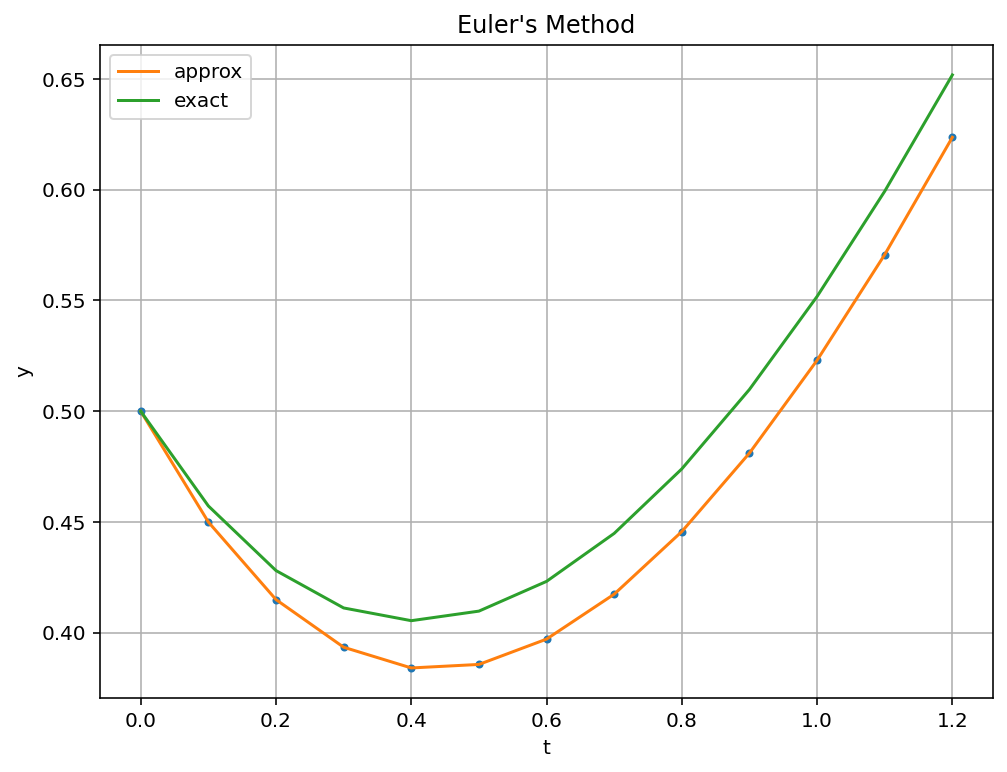

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(t,y_euler,'.')
plt.plot(t,y_euler,label='approx')

plt.plot(t,y_exact,label='exact')
plt.legend();
plt.grid()
plt.xlabel("t")
plt.ylabel("y")
plt.title("Euler's Method");

# To save a copy of the plot to a file uncomment the following.  Note you must have your drive mounted.
#plt.savefig("euler.png",dpi=300)

<hr>

# Improved Euler's Method

Euler’s method, while nice in its simplicity, is too inaccurate and slow for practical use. Euler’s method predicts the next point $(t_{n+1},y_{n+1})$ on the solution curve by computing the slope $f (t, y)$ of the solution curve at the point $(t_n,y_n)$, this is determined by evaluating the slope field at that point -- slope =
$f(t_n, y_n)$.
The improved Euler’s method predicts the next point by computing two slopes and using their average as our final slope value. The two slopes computed are
slope1 = $f (t_n, y_n)$ and slope2 = $f (t_{n+1}, y^*_{n+1})$ . Thus we first need to predict the next value $y^*_{n+1}$ using the
standard Euler procedure. Next slope2, the estimation of the slope at the end point of the interval $[t_n, t_{n+1}]$ is computed. Finally we compute our ultimate estimation for the slope by taking the average of the two: slope = (f (tn, yn) + f (tn+1, y*n+1) / 2. This slope then is used to determine the next point in our solution$(t_{n+1}, y_{n+1})$ and the steps are repeated.

The iteration formulas for the improved Euler's method are thus given by:

$$t_{n+1} = t_n + \Delta t$$

$$y_{n+1} = y_n + \frac{(f(t_n,y_n)+f(t_{n+1},y^*_{n+1}))}{2}\cdot \Delta t$$

where
$$y^*_{n+1} = y_n +f(t_n,y_n)\cdot \Delta t$$

<hr>


<h3> Exercise #2

 For our second exercise we will use  the impoved Euler's method to solve the following initial value problem.

$$y' = -y +t$$
$$y(0) = 0.5$$

 Solve on interval $[0,1.2]$ and use h = 0.1.


<hr>

The suggested algorithm for implementing the improved Euler method is:

1. Define the slope function.
2. Set the value of h.
3. Intialize the array of time values. We call the array "t".
4. Intialize the y_improved array to zeros.
5. Set the initial condition for y_improved.
6. Repeat the following:<br>

Compute slope1 using slope1= $ f(t_n,y_n) $ <br>
Compute $y^*_{n+1}$ <br>
Compute slope2 using slope2=$f(t_{n+1},y^*_{n+1})$<br>
Define slope = (slope1+slope2)/2<br>
Compute $y_{n+1}=y_n+\text{slope} \cdot h$
<hr>



<h3>  Exercise 2.a


<h4> The code that implements Euler's method is copied in the cell below. Edit this code to implement the improved Euler method (Use the algorithm above). Note you need to rename the variable y_euler to y_improved.

In [ ]:
# define slope function

def f(t,y):
    return -y + t

h = 0.1


# We first "discretize" the domain.  The array t holds the t values

t = np.arange(0,1.3,h) 

y_improved = np.zeros_like(t)  # initialize y array to zeros
y_improved[0] = 0.5 # set the intial value

# implement Euler's method


for i in range(len(y_euler)-1):
    slope1 = f(t[i],y_improved[i])
    y_temp = y_improved[i]+slope1*h
    slope2= f(t[i+1],y_temp)
    slope = (slope1+slope2)/2
    y_improved[i+1] = y_improved[i] + slope * h

<h4> Now let us see the results in table form.  Execute the cell below. You should see a table with 4 columns. If you get an error try to troubleshoot.
    If necessary you can share the notebook with me and I will help.

In [ ]:
df = pd.DataFrame({"t":t,"y_exact":y_exact,"y_Euler":y_euler,"y_Impoved":y_improved})
df

,t,y_exact,y_Euler,y_Impoved
0,0.0,0.500000,0.500000,0.500000
1,0.1,0.457256,0.450000,0.457500
2,0.2,0.428096,0.415000,0.428538
3,0.3,0.411227,0.393500,0.411826
4,0.4,0.405480,0.384150,0.406203
5,0.5,0.409796,0.385735,0.410614
6,0.6,0.423217,0.397162,0.424105
7,0.7,0.444878,0.417445,0.445815
8,0.8,0.473993,0.445701,0.474963
9,0.9,0.509854,0.481131,0.510841


<hr>

## Percent Error for improved Euler's method

<h4> Let us now compute the percent error for $y(1)$.  Execute the cell below to display the percent error. Hint: your answer should be less that $0.1$%. For y_exact[1] enter the value you computed by hand when you solved the ode. Express to 2 decimal places.

In [ ]:
# Using the improved Euler method the % error when computing y(1) is:
error = np.abs(y_exact[1]-y_improved[1])/y_exact[1]*100
print(f"The percent error is {round(error,2)}%.")

The percent error is 0.05%.


<h4> Execute the cell below to see a plot of the comparison between y_exact and y_improved. Look closely the curves could lie on top of one another.

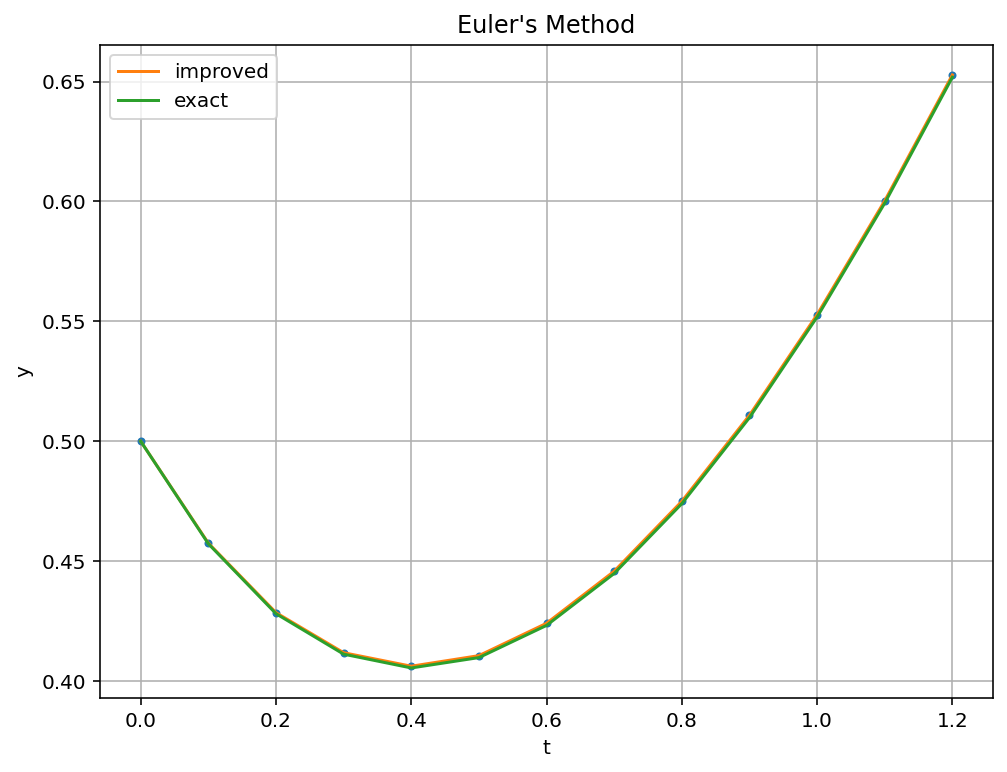

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(t,y_improved,'.')
plt.plot(t,y_improved,label='improved')

plt.plot(t,y_exact,label='exact')
plt.legend();
plt.grid()
plt.xlabel("t")
plt.ylabel("y")
plt.title("Euler's Method");

# To save a copy of the plot to a file uncomment the following.  Note you must have your drive mounted.
#plt.savefig("euler.png",dpi=300)

<hr>

## Exercise #3

For the final exercise you are to use the improved Euler’s method to obtain the approximate value of y(1.5) for the solution of the initial value problem.

$$y ' = 2 xy, y(1) = 1$$

Use h = 0.1. Analytically compute the exact value and compute the percent error.


In [ ]:
# In this cell enter the necessary code to compute y(1.5) using the improved Euler's method. Hint: copy your previous code to this cell and edit it
# accordingly

# define slope function

def ff(x,y):
    return 2*x*y

h = 0.1


# We first "discretize" the domain.  The array x holds the x values

x = np.arange(1,1.6,h) 

y = np.zeros_like(x)  # initialize y array to zeros
y[0] = 1 # set the intial value - note y[0] = y(1)

# implement Euler's method


for i in range(len(y)-1):
    slope1 = ff(x[i],y[i])
    y_temp = y[i]+slope1*h
    slope2= ff(x[i+1],y_temp)
    slope = (slope1+slope2)/2
    y[i+1] = y[i] + slope * h





In [ ]:
print(f"The approximate value of Y(1.5) using the improved Euler method is {y[5]}")

The approximate value of Y(1.5) using the improved Euler method  is 3.4509285071431197


### Next solve the ode and determine the value y(1.5)
This step is not done using python.  Here you have to solve the ode.  Note this equation is separable.

---

## We analytically solve for the exact solution as follows:

![problem](https://github.com/rmartin977/math---267-Spring-2022/blob/main/problem.png?raw=true)

In [ ]:
print(f"The exact value of y(1.5) is {np.exp(1.5**2-1)}")

The exact value of y(1.5) is 3.4903429574618414


In [ ]:
# Enter the necessary code in this cell to compute the percent error and display the % error for the previous problem.  Copy and edit the code
# used earlier

print(f"The percent error is {}")






In [ ]:
# Using the improved Euler method the % error when computing y(1.5) is:
error = np.abs((3.49-y[5])/y[5])*100
print(f"The percent error is {round(error,2)}%.")

The percent error is 1.13%.


Finally when done share this notebook with ....  rm908@email.vccs.edu
